<a href="https://colab.research.google.com/github/pedrov718/classifying_mental_health_with_NN/blob/main/mental_health_prelim_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
posts = pd.read_excel("/content/mental_health_posts_scraped.xlsx", index_col= 'Unnamed: 0')

In [ ]:
posts.shape

(19687, 8)

In [ ]:
posts.columns

Index(['Title', 'Post Text', 'ID', 'Score', 'Total Comments', 'Origin',
       'Post URL', 'text'],
      dtype='object')

In [ ]:
posts.Origin.value_counts()

autism           3444
depression       3301
schizophrenia    3291
bipolar          3272
BPD              3260
Anxiety          3119
Name: Origin, dtype: int64

In [ ]:
posts.loc[posts['text'] == 'deleted']

,Title,Post Text,ID,Score,Total Comments,Origin,Post URL,text


In [ ]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19687 entries, 0 to 19686
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           19687 non-null  object
 1   Post Text       14632 non-null  object
 2   ID              19687 non-null  object
 3   Score           19687 non-null  int64 
 4   Total Comments  19687 non-null  int64 
 5   Origin          19687 non-null  object
 6   Post URL        19687 non-null  object
 7   text            19687 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [ ]:
import numpy as np
import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics.pairwise import normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

nlp = spacy.load("en_core_web_sm")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 nlp = nlp,
                 n_jobs=1):
        """
        Text preprocessing transformer includes steps:
            1. Punctuation removal
            2. Stop words removal
            3. Lemmatization

        nlp  - spacy model
        n_jobs - parallel jobs to run
        """
        self.nlp = nlp
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        return self

    def transform(self, X, *_):
        X_copy = X.copy()

        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _preprocess_text(self, text):
        doc = self.nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)
        return self._lemmatize(removed_stop_words)

    def _remove_punct(self, doc):
        return (t for t in doc if t.text not in string.punctuation)

    def _remove_stop_words(self, doc):
        return (t for t in doc if not t.is_stop)

    def _lemmatize(self, doc):
        return ' '.join(t.lemma_ for t in doc)

In [ ]:
X = posts.pop('text')
y = posts.pop('Origin')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, train_size= .3, random_state= 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import  LogisticRegressionCV
from sklearn.pipeline import Pipeline



clf  = Pipeline(steps=[
        ('normalize', TextPreprocessor(n_jobs=-1)), 
        ('features', TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)),
        ('classifier', LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', n_jobs=-1, verbose=1))
    ])

clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 11 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 10 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 6 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


Pipeline(steps=[('normalize', TextPreprocessor(n_jobs=-1)),
                ('features',
                 TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)),
                ('classifier',
                 LogisticRegressionCV(cv=5, n_jobs=-1, scoring='accuracy',
                                      solver='saga', verbose=1))])

In [ ]:
predictions = clf.predict(X_test)

predict_proba = clf.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

      Anxiety       0.77      0.73      0.75      2183
          BPD       0.72      0.78      0.75      2282
       autism       0.72      0.72      0.72      2411
      bipolar       0.67      0.57      0.61      2290
   depression       0.62      0.78      0.69      2311
schizophrenia       0.71      0.62      0.66      2304

     accuracy                           0.70     13781
    macro avg       0.70      0.70      0.70     13781
 weighted avg       0.70      0.70      0.70     13781



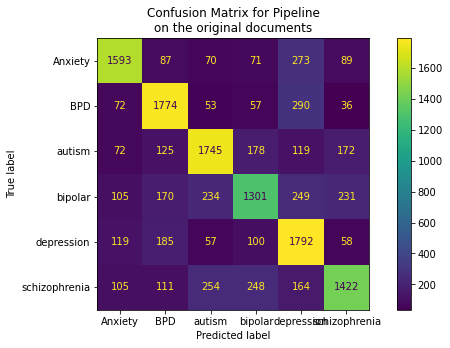

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)
# ax.xaxis.set_ticklabels(target_names)
# ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

## Definign a cross validation fucntion for our pipeline object

In [49]:
def cross_validation_pip(X_train, y_train, estimator, num_split = 5):
  
  kf = KFold(n_splits= num_split)

  kf.get_n_splits(X_train)
  
  score_val_list = []
  score_train_list = []
  
  for train_index, test_index in kf.split(X):
      # print("TRAIN:", train_index, "TEST:", test_index)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      estimator.fit(X_train, y_train)
      y_pred_train = estimator.predict(X_train)
      y_pred_test = estimator.predict(X_test)

      #f1_score(y_test, y_pred_best)
      # now how did we do?
      f1_train = f1_score(y_train, y_pred_train)
      f1_val = f1_score(y_test, y_pred_test)
      score_val_list.append(f1_val)
      score_train_list.append(f1_train)
    
  return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

## Linear SVM estimator with random grid search

In [ ]:
# defining parameter range
param_grid_SVM = {'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
              'classifier__tol': [1e-5, 1e-4, 1e-2, 1, 1e3],
              'features__max_df': (0.25, 0.5, 0.75, 1),
              'features__min_df': (.001, .01, .1)
              } 

In [ ]:
SVM  = Pipeline(steps=[
        ('normalize', TextPreprocessor(n_jobs=-1)), 
        ('features', TfidfVectorizer(ngram_range=(1, 3), sublinear_tf=True)),
        ('classifier', LinearSVC(max_iter=10000, random_state=42))
    ]) 

In [ ]:
rs_svm = RandomizedSearchCV(SVM, param_grid_SVM, n_iter=5, scoring= 'f1', n_jobs= -1, refit=True, random_state=42, return_train_score=True)

rs_svm.fit(X_train, y_train)

best_svm = rs_svm.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

In [ ]:
best_svm.fit(X_train, y_train)

y_pred_best_svm = best_svm.predict(X_test)

y_proba_best_svm =  best_svm.decision_function(X_test)

best_svm_score = best_svm.score(X_test, y_test)

In [ ]:
cross_validation_pip(X_test, y_test, best_svm, num_split = 5)

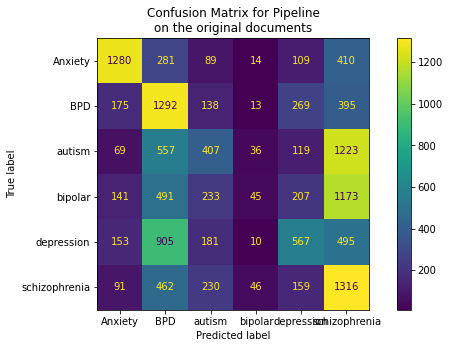

In [ ]:
plot_confusion_mafig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions( y_test, y_pred_best_svm,  ax=ax)
# ax.xaxis.set_ticklabels(target_names)
# ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

In [52]:
print(classification_report(y_test, y_pred_best_svm))

               precision    recall  f1-score   support

      Anxiety       0.67      0.59      0.63      2183
          BPD       0.32      0.57      0.41      2282
       autism       0.32      0.17      0.22      2411
      bipolar       0.27      0.02      0.04      2290
   depression       0.40      0.25      0.30      2311
schizophrenia       0.26      0.57      0.36      2304

     accuracy                           0.36     13781
    macro avg       0.37      0.36      0.33     13781
 weighted avg       0.37      0.36      0.32     13781



## Now its time to fit a NAive Bayes classifyer

In [ ]:
# defining parameter range
param_grid_NB = {'features__max_df': (0.25, 0.5, 0.75, 1),
              'features__min_df': (.001, .01, .1, .5, 1),
              'features__ngram_range' : ((1,1), (1,2), (1,3))
              } 

In [ ]:
NB  = Pipeline(steps=[
        ('normalize', TextPreprocessor(n_jobs=-1)), 
        ('features', TfidfVectorizer(ngram_range=(1, 3), sublinear_tf=True)),
        ('classifier', MultinomialNB(alpha=1.0, fit_prior=True))
    ]) 

In [ ]:
rs_nb = RandomizedSearchCV(NB, param_grid_NB, n_iter=5, scoring= 'f1', n_jobs= -1, refit=True, random_state=42, return_train_score=True)

rs_nb.fit(X_train, y_train)

best_nb = rs_nb.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

In [ ]:
best_nb.fit(X_train, y_train)

y_pred_best_nb = best_nb.predict(X_test)

y_proba_best_nb =  best_nb.predict_proba(X_test)

best_nb_score = best_nb.score(X_test, y_test)

In [50]:
cross_validation_pip(X_test, y_test, best_svm, num_split = 5)

Process ForkPoolWorker-49:
Process ForkPoolWorker-50:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-26-a23a2ce414ec>", line 57, in _preprocess_part
    return part.apply(self._preprocess_text)
  Fil

KeyboardInterrupt: ignored

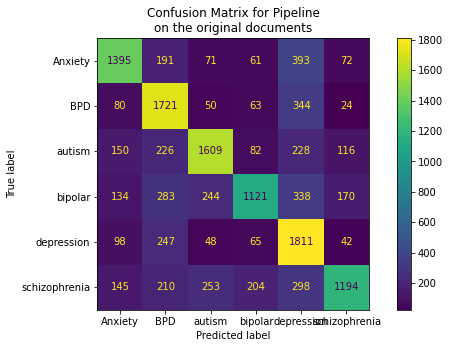

In [ ]:
plot_confusion_mafig, ax = plt.subplots(figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions( y_test, y_pred_best_nb,  ax=ax)
# ax.xaxis.set_ticklabels(target_names)
# ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

In [51]:
print(classification_report(y_test, y_pred_best_nb))

               precision    recall  f1-score   support

      Anxiety       0.70      0.64      0.67      2183
          BPD       0.60      0.75      0.67      2282
       autism       0.71      0.67      0.69      2411
      bipolar       0.70      0.49      0.58      2290
   depression       0.53      0.78      0.63      2311
schizophrenia       0.74      0.52      0.61      2304

     accuracy                           0.64     13781
    macro avg       0.66      0.64      0.64     13781
 weighted avg       0.66      0.64      0.64     13781



## saving pickled models to disk

In [46]:
import joblib

# save the model to disk
# filename = 'logistic_model.sav'
# joblib.dump(clf, filename)

filename = 'svm_model.sav'
joblib.dump(best_svm, filename)

filename = 'naivebayes_model.sav'
joblib.dump(best_nb, filename)


['naivebayes_model.sav']